# Сортировка вставкой
Пусть есть массив `A[0..n-1]` длины `n`. Необходимо его отсортировать.  
Будем применять **метод уменьшения на постоянную величину (на 1)**: предполагаем, что задача для `A[0...n-2]` уже решена и  имеется отсортированный массив длины `n-1`: `A[0] <= A[1] <= ... <= A[n-2]`. Все, что необходимо сделать - это найти нужную позицию для элемента `A[n-1]` среди отсортированных элементов. Реализация данного подхода чаще всего "снизу вверх" (то есть не рекурсивный подход).






**Простая сортировка вставкой (straight insertion sort)** - сканирование массива слева-направо (справа-налево) до первого элемента, большего или равного (меньше или равного) `A[n-1]`. Вставка `A[n-1]` непосредственно перед (после) этим элементом.
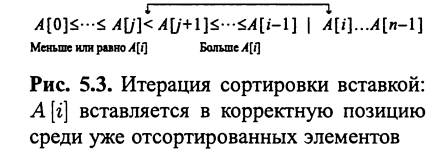

In [15]:
def insertion_sort(array):
    n = len(array)
    count_f = 0 # для подсчета сравнений
    for i in range(1, n):
        tmp = array[i]
        j = i-1
        count_f += 1
        while j >= 0 and array[j] > tmp:
            if j < i-1: count_f += 1
            # сдвигаем вправо все элементы, которые больше tmp
            array[j+1] = array[j]
            # идем ещё левее
            j -= 1
        array[j+1] = tmp
    print(f'При сортировке вставками было произведено {count_f} сравнений ключей'
          f' при размере входного массива - {n}')

example = [2,3, 1, 5, 9, 1, 0, 23, 4]
insertion_sort(example)
print('После сортировки: ', example)

При сортировке вставками было произведено 19 сравнений ключей при размере входного массива - 9
После сортировки:  [0, 1, 1, 2, 3, 4, 5, 9, 23]


Базовой операцией алгоритма является сравнение ключей `array[j] > tmp`. Количество сравнений зависит от природы входных данных (*то есть данный алгоритм относится к классу количественно-параметрических по влиянию входа на трудоемкость*).  

В худшем случае (когда массив отсортирован в обратном порядке) имеем $\frac{(n-1)*n}{2}$ сравнений. В лучшем случае (когда массив отсортирован в нужном порядке) имеем всего $n-1$ сравнение.

In [16]:
example_2 = [10, 9, 8, 7, 6, 5, 4, 3, 2]
insertion_sort(example_2)
print('Отсортированный худший случай: ', example_2)
print()

example_3 = [2, 3, 4, 5, 6, 7, 8, 9, 10]
insertion_sort(example_3)
print('Отсортированный лучший случай: ', example_3)

При сортировке вставками было произведено 36 сравнений ключей при размере входного массива - 9
Отсортированный худший случай:  [2, 3, 4, 5, 6, 7, 8, 9, 10]

При сортировке вставками было произведено 8 сравнений ключей при размере входного массива - 9
Отсортированный лучший случай:  [2, 3, 4, 5, 6, 7, 8, 9, 10]


Сортировка вставками оказывается весьма эффективной в том случае, когда приходится сталкиваться с почти отсортированными файлами. Иногда можно комбинировать различные виды сортировок (например, сортировать весь файл быстрой сортировкой, но, дойдя до определенного размера (например, когда размер подмассива равен 10), применить сортировку вставкой.

Время работы сортировки вставками - $\theta(n^2)$


**Бинарная сортировка вставками (binary insertion sort)** - для поиска позиции `A[n-1]` среди отсортированных элементов `A[0]<=...<=A[n-2]` алгоритм использует бинарный поиск.

In [35]:
def binary_search_for_sort(array, elem):
    left, right = 0, len(array)-1
    while left <= right:
        center = (left + right) // 2
        if array[center] < elem:
            left = center+1
        elif array[center] > elem:
            right = center-1
        else:
            return center
    return left


print('Особый бинарный поиск для присутствующего элемента: ', binary_search_for_sort([1,2,3,4,5,6], 3))
print('Особый бинарный поиск для отсутствующего элемента: ', binary_search_for_sort([1,2,3,4,5,6], 3.5))


def binary_insertion_sort(array):
    n = len(array)
    print(f'Длина входного массива - {n}')
    for i in range(1, n):
        tmp = array[i]
        index = binary_search_for_sort(array, tmp)
        j = i-1
        while j >= index:
            array[j+1] = array[j]
            j -= 1
        array[index] = tmp 

print()        
example_4 = [0, 10, 2, 13, 4, 12, -1, 40, 20, 5]
binary_insertion_sort(example_4)
print(example_4)

Особый бинарный поиск для присутствующего элемента:  2
Особый бинарный поиск для отсутствующего элемента:  3

Длина входного массива - 10
[-1, 0, 2, 5, 10, 13, 13, 4, 10, 20]
